<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/chg-output/mnist-identification/Number_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

The application uses fastai & pytorch library

In [26]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### Download Raw Data

Raw data used here is from fastai course, because the data is in image format, and the image size is identical.

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [7]:
(path/'training').ls()

(#10) [Path('training/0'),Path('training/3'),Path('training/1'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/9'),Path('training/7'),Path('training/8'),Path('training/2')]

In [8]:
(path/'testing').ls()

(#10) [Path('testing/0'),Path('testing/3'),Path('testing/1'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/9'),Path('testing/7'),Path('testing/8'),Path('testing/2')]

In [9]:
fours = (path/'training/4').ls().sorted()

In [10]:
len(fours)

5842

In [11]:
Image.open(fours[542])

## Init Variables

Store images data to a variable, then convert it to a tensor array.

In [12]:
zeros = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()

In [13]:
zero_tensor = [tensor(Image.open(o)) for o in zeros]
one_tensor = [tensor(Image.open(o)) for o in ones]
two_tensor = [tensor(Image.open(o)) for o in twos]
three_tensor = [tensor(Image.open(o)) for o in threes]
four_tensor = [tensor(Image.open(o)) for o in fours]
five_tensor = [tensor(Image.open(o)) for o in fives]
six_tensor = [tensor(Image.open(o)) for o in sixes]
seven_tensor = [tensor(Image.open(o)) for o in sevens]
eight_tensor = [tensor(Image.open(o)) for o in eights]
nine_tensor = [tensor(Image.open(o)) for o in nines]

In [14]:
zero_stack = torch.stack(zero_tensor).float()/255.0
one_stack = torch.stack(one_tensor).float()/255.0
two_stack = torch.stack(two_tensor).float()/255.0
three_stack = torch.stack(three_tensor).float()/255.0
four_stack = torch.stack(four_tensor).float()/255.0
five_stack = torch.stack(five_tensor).float()/255.0
six_stack = torch.stack(six_tensor).float()/255.0
seven_stack = torch.stack(seven_tensor).float()/255.0
eight_stack = torch.stack(eight_tensor).float()/255.0
nine_stack = torch.stack(nine_tensor).float()/255.0

In [15]:
zero_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/0').ls().sorted()]).float()/255.0
one_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/1').ls().sorted()]).float()/255.0
two_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/2').ls().sorted()]).float()/255.0
three_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/3').ls().sorted()]).float()/255.0
four_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/4').ls().sorted()]).float()/255.0
five_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/5').ls().sorted()]).float()/255.0
six_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/6').ls().sorted()]).float()/255.0
seven_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/7').ls().sorted()]).float()/255.0
eight_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/8').ls().sorted()]).float()/255.0
nine_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/9').ls().sorted()]).float()/255.0

t_tensors = [zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, 
            five_t_tensor, six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]

## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a method to optimize objective function with suitable smoothness properties iteratively. The difference between SGD and gradient descent is that SGD uses mini-batch instead of processing all inputs at once, which makes SGD faster and cost efficient.


There are seven steps when trying to identify number using SGD:

1. Initialize weight with random value
1. Predict the number
1. Calculate the model loss (how far the prediction from actual result)
1. Calculate gradient, to measure new weight
1. Step(change) all the weight based on calculation
1. Go back to step 2, and repeat
1. Iterate until you decide to stop 

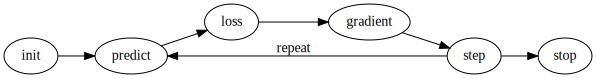

In [16]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

### Mini-Batch
To split data into several batches, I use `DataLoader` class to load data, randomize the entry, and split the data into several batches.

In [17]:
train_x = torch.cat([zero_stack, one_stack,  two_stack, three_stack, four_stack, five_stack, six_stack, seven_stack, eight_stack, nine_stack]).view(-1, 28*28)
train_y = tensor([0]* len(zeros) + [1]* len(ones) + [2]* len(twos) + [3]* len(threes) + [4]* len(fours) + [5]* len(fives) + 
                 [6]* len(sixes) + [7]* len(sevens) + [8]* len(eights) + [9]* len(nines))
train_dl = DataLoader(list(zip(train_x, train_y)), batch_size=256)

In [18]:
validation_x = torch.cat([zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, five_t_tensor, 
                     six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]).view(-1, 28*28)
validation_y = tensor([0]* len(zero_t_tensor) + [1]* len(one_t_tensor) + [2]* len(two_t_tensor) + [3]* len(three_t_tensor) + [4]* len(four_t_tensor) + [5]* len(five_t_tensor) + 
                 [6]* len(six_t_tensor) + [7]* len(seven_t_tensor) + [8]* len(eight_t_tensor) + [9]* len(nine_t_tensor))
validation_dl = DataLoader(list(zip(validation_x, validation_y)), batch_size=256)

In the code above, I map the X axis with image tensors, and Y axis with numbering label to create training and validation datasets.

In [19]:
def train_epoch(model):
  result = []
  for xb, yb in train_dl:
    loss = calculate_gradient(xb, yb, model)
    for p in params:
      p.data -= p.grad * lr
      p.grad.zero_()
    result.append(loss.detach())
  return torch.stack(result).mean()

def calculate_gradient(xb, yb, model, loss_func=F.cross_entropy):
  preds = model(xb)
  loss = loss_func(preds, yb)
  loss.backward()

  return loss

def train_model(model, epochs):
    for i in range(epochs):
        loss = train_epoch(model)
        accuracy = validate_epoch(model)
        print(f"Loss: {loss}")
        print(f"Accuracy: {accuracy}")
        
def linear1(xb):
    return xb@w + b


In [20]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in validation_dl]
  return round(torch.stack(accs).mean().item(), 4)

def batch_accuracy(result, yb):
  scores = result.softmax(1)
  accuracy = num_correct(scores, yb) / float(yb.size(0))
  return accuracy

def num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).float().sum()


I define several functions. `train_model` is the main method that will be used to view function loss and mode accuracy. In every epoch, functions `train_epoch` and `validate_epoch` is called sequentially. In `train_epoch`, the function will calculate gradient by using cross entropy.

In validation process, `batch_accuracy` will caluclate SoftMax distribution. This distribution determines probability of a numeric image detection result from number 0 to 9. In `num_correct`, the function will get which array index (array index is a representation of number result) has highest probability, and will be compared with actual result to test the model accuracy.

In [21]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

#Init variables with random values
w = init_params((28*28, 10))
b = init_params(10)

params = w , b
lr = 1.


In [22]:
#Print weight and bias before training
params

(tensor([[ 1.9269,  1.4873,  0.9007,  ..., -1.6047, -0.7521,  1.6487],
         [-0.3925, -1.4036, -0.7279,  ..., -0.1596, -0.4974,  0.4396],
         [-0.7581,  1.0783,  0.8008,  ...,  1.3347, -0.2316,  0.0418],
         ...,
         [-0.0560, -0.4547,  1.2942,  ...,  1.1133,  2.1901,  0.3531],
         [ 0.4474,  0.7192, -1.9300,  ..., -0.8714,  0.2235,  0.2528],
         [ 0.2169,  0.4700,  0.3268,  ...,  0.0470,  0.5487, -1.9951]], requires_grad=True),
 tensor([ 1.3673, -0.3805,  0.4782,  1.3093,  0.5289,  1.6473,  1.4642,  0.2509,  0.9407,  0.8538], requires_grad=True))

In [23]:
validate_epoch(linear1)

0.1258

In [24]:
train_model(linear1, 20)

Loss: 1.136893391609192
Accuracy: 0.2582
Loss: 0.5502617359161377
Accuracy: 0.2812
Loss: 0.39715373516082764
Accuracy: 0.3349
Loss: 0.3519817888736725
Accuracy: 0.3755
Loss: 0.3236941397190094
Accuracy: 0.4091
Loss: 0.305554062128067
Accuracy: 0.4286
Loss: 0.29184842109680176
Accuracy: 0.4418
Loss: 0.27974575757980347
Accuracy: 0.4519
Loss: 0.2693098783493042
Accuracy: 0.4601
Loss: 0.2599692642688751
Accuracy: 0.4683
Loss: 0.251607209444046
Accuracy: 0.4736
Loss: 0.2442314773797989
Accuracy: 0.4811
Loss: 0.23770566284656525
Accuracy: 0.4863
Loss: 0.2319006621837616
Accuracy: 0.4907
Loss: 0.22666725516319275
Accuracy: 0.495
Loss: 0.22190703451633453
Accuracy: 0.4981
Loss: 0.2175596058368683
Accuracy: 0.5015
Loss: 0.21358345448970795
Accuracy: 0.504
Loss: 0.20994223654270172
Accuracy: 0.5066
Loss: 0.2065952718257904
Accuracy: 0.5094


In [25]:
# Print weight and bias after training
params

(tensor([[ 1.9269,  1.4873,  0.9007,  ..., -1.6047, -0.7521,  1.6487],
         [-0.3925, -1.4036, -0.7279,  ..., -0.1596, -0.4974,  0.4396],
         [-0.7581,  1.0783,  0.8008,  ...,  1.3347, -0.2316,  0.0418],
         ...,
         [-0.0560, -0.4547,  1.2942,  ...,  1.1133,  2.1901,  0.3531],
         [ 0.4474,  0.7192, -1.9300,  ..., -0.8714,  0.2235,  0.2528],
         [ 0.2169,  0.4700,  0.3268,  ...,  0.0470,  0.5487, -1.9951]], requires_grad=True),
 tensor([-0.5247,  0.7532,  1.2962, -0.8335,  0.3063,  5.2543,  0.7062,  2.5766, -2.2327,  1.1580], requires_grad=True))